In [2]:
import numpy as np
%matplotlib widget

import matplotlib.pyplot as plt

from numpy.polynomial import Polynomial


## Lagrange interpolation

In [6]:
rng = np.random.default_rng()
n = 6



X = rng.uniform(size=n)
Y = rng.uniform(size=n)
M = np.empty((n,n))


for i in range(n):
    M[i] = [X[i]**p for p in range(n)]
P = Polynomial(np.linalg.solve(M,Y))

In [7]:
print(P)

-2.198629 + 74.44415813·x - 543.47722622·x² + 1604.6171798·x³ -
2079.01650873·x⁴ + 973.40751242·x⁵


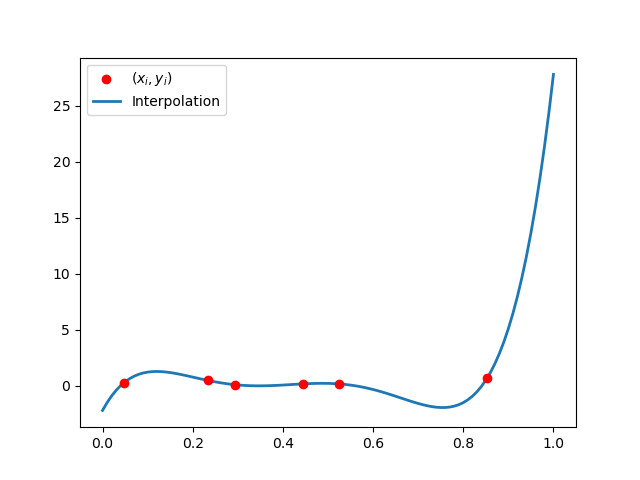

In [8]:
fig, ax = plt.subplots()
ax.scatter(X,Y,color='red',label = r'$(x_i,y_i)$',zorder = 1)
x = np.linspace(0,1,101)
ax.plot(x,P(x), linewidth=2, label = 'Interpolation',zorder = 0)
ax.legend(loc=0)


## Hermitte interpolation

In [72]:
rng = np.random.default_rng()
X = rng.uniform(size=2)
X = [-1,1]
Y = rng.uniform(size=4)
p = rng.uniform(low=-1, high=1, size=2)
q = rng.uniform(low=-5, high=5, size=2)
M = np.empty((n,n))
for i in range(2):
    M[i] = [X[i]**p for p in range(4)]
    M[i+2] = [p * X[i]**(p-1) for p in range(4)]
H = Polynomial(np.linalg.solve(M,Y))

In [73]:
print(H)
print(H(X[0]), Y[0])
print(H(X[1]), Y[1])
Hp = H.deriv()
print(Hp(X[0]), Y[2])
print(Hp(X[1]), Y[3])


0.5967931 - 0.84106575·x + 0.00575154·x² + 0.49377035·x³
0.9498400417200233 0.9498400417200233
0.2552492498430402 0.2552492498430403
0.6287422280625032 0.6287422280625033
0.6517483954828791 0.6517483954828792


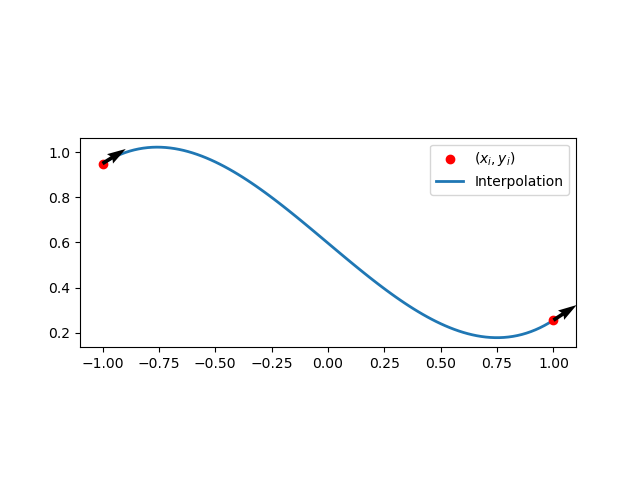

In [74]:
fig, ax = plt.subplots()
ax.scatter(X,Y[0:2],color='red',label = r'$(x_i,y_i)$',zorder = 1)
ax.quiver(X, Y[0:2], [1,1], Y[2:4])
x = np.linspace(-1,1,101)
ax.plot(x,H(x), linewidth=2, label = 'Interpolation',zorder = 0)
ax.set_aspect('equal', 'box')
ax.legend(loc=0)
